Questions to Explore:

How does customer age and gender influence their purchasing behavior?

Are there discernible patterns in sales across different time periods?

Which product categories hold the highest appeal among customers?

How do customers adapt their shopping habits during seasonal trends?

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#load data and parse date/time
sales = pd.read_csv('retail_sales_dataset.csv', parse_dates=['Date'])

In [14]:
#check data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [17]:
#customer overview of demographics data
sales.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


<Axes: ylabel='Product Category'>

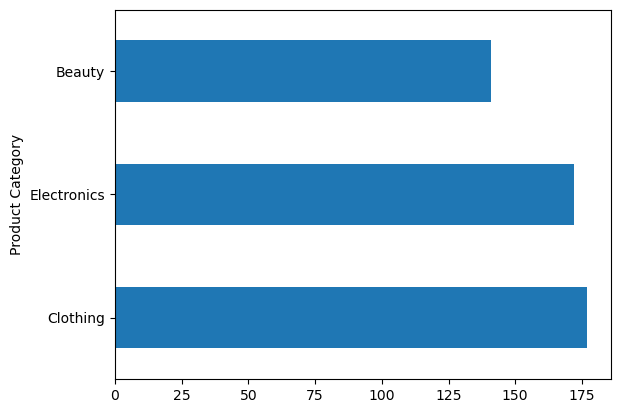

In [95]:
#male sales by category
male = sales['Gender'] == 'Male'
sales[male].value_counts('Product Category').plot(kind='barh')

<Axes: ylabel='Product Category'>

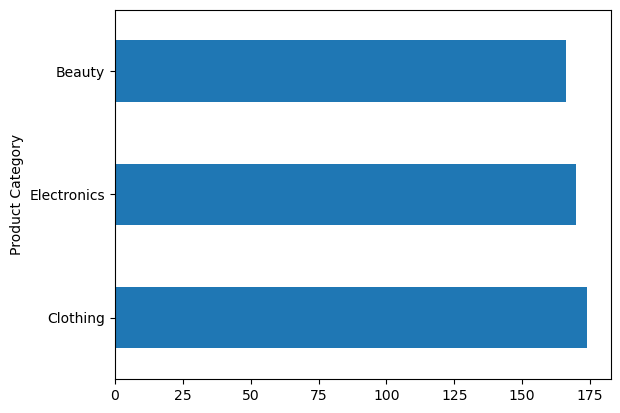

In [94]:
#female sales by category
female = sales['Gender'] == 'Female'
sales[female].value_counts('Product Category').plot(kind='barh')

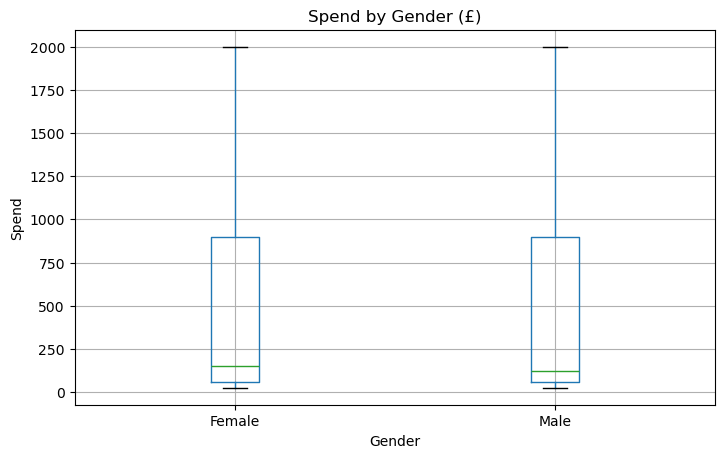

In [161]:
#Spend by Gender
sales.boxplot(column='Total Amount', by='Gender', figsize=(8, 5))
plt.ylabel('Spend')
plt.title('Spend by Gender (£)')
plt.suptitle('') 
plt.grid(True)

<Axes: ylabel='Product Category'>

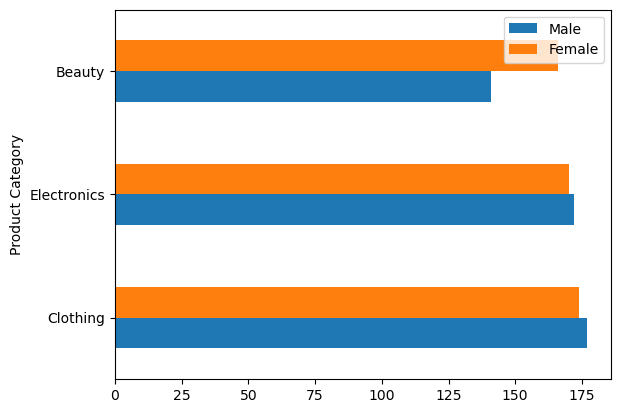

In [121]:
#for comparison
#Filter sales by gender
male_counts = sales[sales['Gender'] == 'Male']['Product Category'].value_counts()
female_counts = sales[sales['Gender'] == 'Female']['Product Category'].value_counts()

#Combine into DF
gender_counts = pd.DataFrame({'Male': male_counts,'Female': female_counts})

#Plot
gender_counts.plot(kind='barh')

Text(0, 0.5, 'No of Sales')

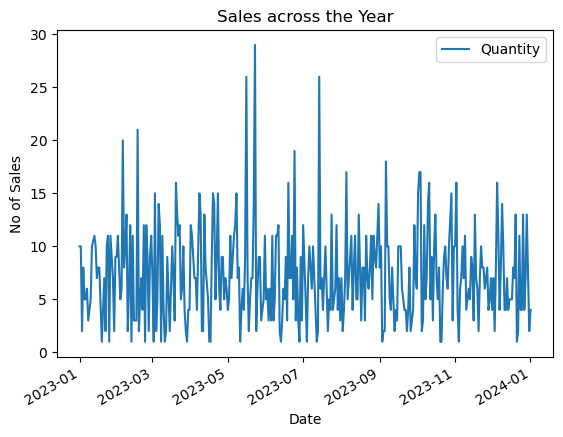

In [151]:
#sales by day across the year
#Group
units_per_date = sales.groupby('Date')['Quantity'].sum().reset_index()
#Sort
units_per_date = units_per_date.sort_values('Date')
#Plot
units_per_date.set_index('Date').plot(kind='line')
plt.title('Sales across the Year')
plt.xlabel('Date')
plt.ylabel('No of Sales')

Text(0, 0.5, 'No of Sales')

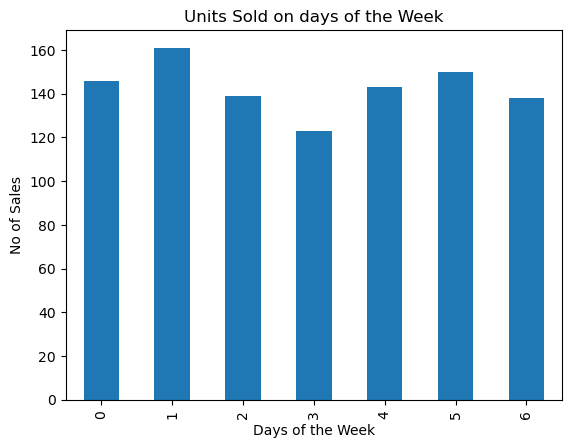

In [150]:
#sales by days of the week, Monday=0
sales['Date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.title('Units Sold on days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('No of Sales')

Text(0, 0.5, 'No of Sales')

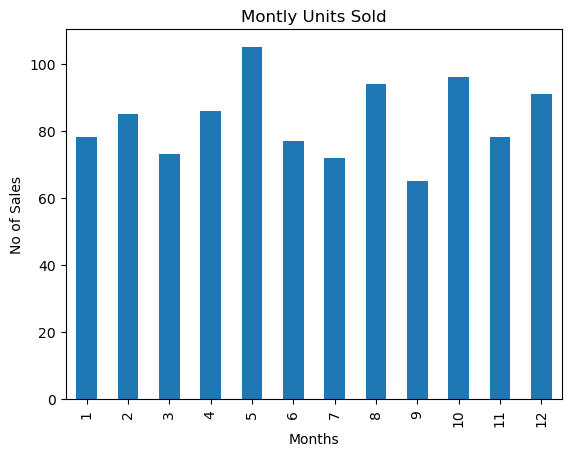

In [149]:
#sales by months of the week, January=1
sales['Date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Montly Units Sold')
plt.xlabel('Months')
plt.ylabel('No of Sales')

Text(0, 0.5, 'No of Sales')

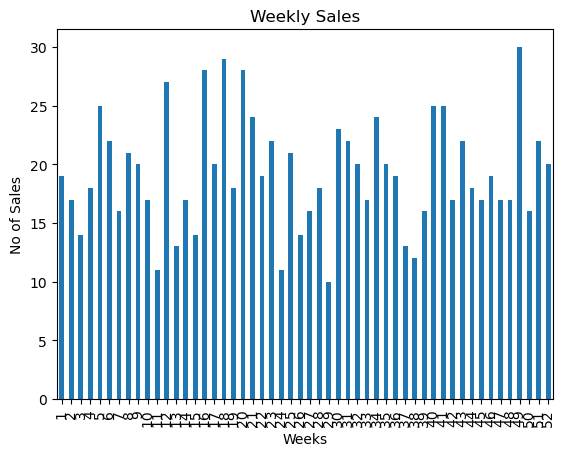

In [152]:
#by weeks of the year
sales['Date'].dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')
plt.title('Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('No of Sales')

In [126]:
#average spend by over 40s
over_40 = sales[sales['Age'] >= 40]
over_40_mean = over_40['Total Amount'].mean()

In [125]:
#average spend by under 21s
Under_21 = sales[sales['Age'].between(18,21)]
Under_21_mean = Under_21['Total Amount'].mean()

In [127]:
#average spend by 21-29
twenties = sales[sales['Age'].between(21,29)]
twenties_mean = twenties['Total Amount'].mean()

In [128]:
#average spend by 30-39
thirties = sales[sales['Age'].between(30,39)]
thirties_mean= thirties['Total Amount'].mean()

Text(0, 0.5, 'Mean Spend (£)')

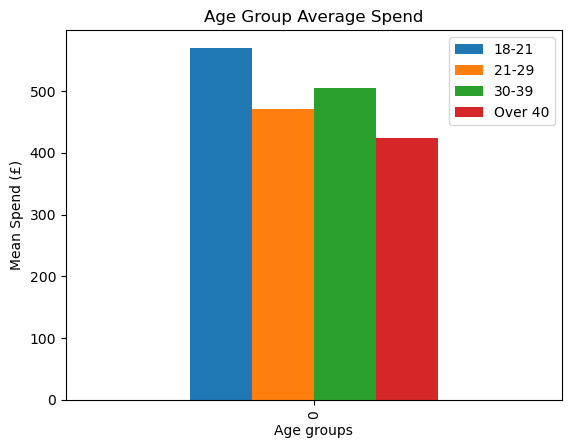

In [154]:
#Combine into DF
gender_spend = pd.DataFrame({'18-21': [Under_21_mean],'21-29': [twenties_mean], '30-39': [thirties_mean], 'Over 40': [over_40_mean]})
gender_spend.plot(kind='bar')
plt.title('Age Group Average Spend')
plt.xlabel('Age groups')
plt.ylabel('Mean Spend (£)')

Text(0, 0.5, 'Mean Spend (£)')

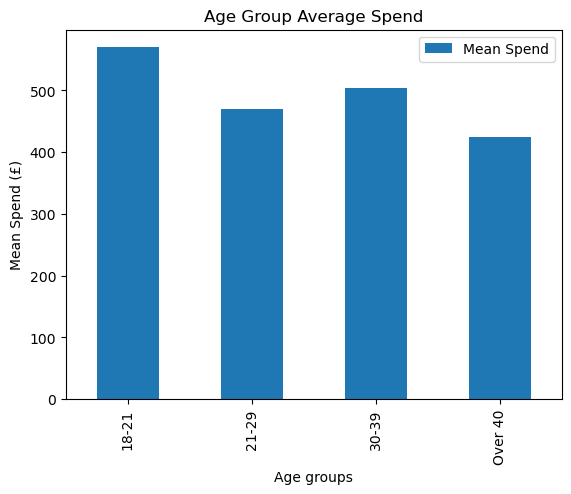

In [155]:
#tidying visual of average spend by age group
gender_spend_tidy = pd.DataFrame({
    'Age Group': ['18-21', '21-29', '30-39', 'Over 40'],
    'Mean Spend': [Under_21_mean, twenties_mean, thirties_mean, over_40_mean]
})
gender_spend_tidy.plot(x='Age Group', y='Mean Spend', kind='bar')
plt.title('Age Group Average Spend')
plt.xlabel('Age groups')
plt.ylabel('Mean Spend (£)')